# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
df2 = pd.read_csv("data\student-mat.csv", sep = ";")
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = df1.iloc[:, 32:]
X.dropna()
y.dropna()

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


## Converting the specific features to binary to make it easier to work with
### school:  GP = 1 , MS = 0
### sex:  F = 1, M = 0
### address: U(urban) = 1, R(rural) = 0
### family size:  LE3 = 1, GT3 = 0
### pstatus: T(living together) = 1, A(living apart) = 0

In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    #ignore = ["age", "Medu", "Fedu","Mjob", "Fjob", 'reason', 'guardian','traveltime', 'studytime',
    #       'failures']
    #print(X.columns)
    #print(X.iloc[0,:])
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape)
    return X

In [5]:
X_fixed = fixingfile(X)
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)

(649, 26)


In [6]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [7]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# FROM here on out the markdown split up which model. Add cells according to which mark down. Here is the order
## 1. Multiple Linear Regression
## 2. Neutral Network 
## 3. SVM

# 1. Multiple Linear Regression

In [8]:
#reshaping ys to 2d
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0],1)
print("Checking y_2d_train is in 2d:", y_2d_train.shape)
print("Checking y_2d_test is in 2d:", y_2d_test.shape)

Checking y_2d_train is in 2d: (389, 1)
Checking y_2d_test is in 2d: (260, 1)


In [9]:
n_train = y_2d_train.shape[0]
n_test = y_2d_test.shape[0]
print("Number training of rows:", n_train)
print("Number testing of rows:", n_test)

Number training of rows: 389
Number testing of rows: 260


In [10]:
# Adding the column of ones infront of x_train
ones_train = np.ones((n_train, 1))
X_1_train = np.hstack((ones_train, X_train))
print("X_1 shape:", X_1_train.shape)
print("X_1 with ones: ", X_1_train)

X_1 shape: (389, 27)
X_1 with ones:  [[ 1.          0.73094388 -1.19993734 ...  1.33986431  1.01290255
  -0.78915946]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466 -1.75498694
  -0.78915946]
 [ 1.          0.73094388  0.83337685 ... -0.99769466  0.32093018
   1.36732259]
 ...
 [ 1.          0.73094388 -1.19993734 ...  1.33986431  1.01290255
  -0.35786305]
 [ 1.          0.73094388  0.83337685 ... -0.21850834 -1.06301457
   0.50472977]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466  1.01290255
  -0.35786305]]


In [11]:
#Adding ones to testing set
ones_test = np.ones((n_test, 1))
X_1_test = np.hstack((ones_test, X_test))
print("X_1_test shape:", X_1_test.shape)
print("X_1_test with ones: ", X_1_test)

X_1_test shape: (260, 27)
X_1_test with ones:  [[ 1.          0.73094388 -1.19993734 ...  1.33986431  1.01290255
   0.93602618]
 [ 1.         -1.36809408  0.83337685 ...  1.33986431  1.01290255
  -0.57351125]
 [ 1.         -1.36809408  0.83337685 ... -0.99769466 -1.75498694
  -0.78915946]
 ...
 [ 1.         -1.36809408 -1.19993734 ...  0.56067799  1.01290255
   0.07343336]
 [ 1.          0.73094388 -1.19993734 ... -0.21850834  1.01290255
   1.36732259]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466  1.01290255
   0.93602618]]


# Doing multiple linear regression with gradient and manually calculating without library

In [12]:
def compute_cost(X_1, y_2d, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    
    # TODO Q07 - Taken from hw
    # Write the cost function
    #ISSUES: X AND Y ARE NOW 2D ARRAYS
    cost = sum((y_2d- (np.dot(X_1, w)))**2)/(2*N)
    
    return cost[0]

In [55]:
def gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # TODO Q08
    # Finish the gradient descent function
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        slope = np.dot(X_1, w)
        der_vector = np.dot(X_1.T,(slope - y_2d))
        w = w - (learning_rate * (1/N)) * der_vector
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [56]:
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000)
#print(g)
print("g[0]: ", g[0][0])

g[0]:  11.847601665231174


In [57]:
def multiple_linear_reg_model_gda(X_1, y_2d, learning_rate, N, num_iters):
    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    # TODO 09 
    # Complete the function
    w = np.zeros((X_1.shape[1],1))
    
    # Calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y_2d, w, N)
    
    # Calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    final_cost = compute_cost(X_1, y_2d, w, N)

    return w, initial_cost, final_cost

In [58]:
#Testing numbers on training set
learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
num_iters = [10,100, 1000, 10000]
track = {}
best_rsq = 0
for nums in num_iters:
    print("*"* 50)
    print(nums)
    for alpha in learning_rate:
        results = multiple_linear_reg_model_gda(X_1_train, y_2d_train, alpha, n_train, nums)
        print("Iter is:", nums, "Alpha is:", alpha)
        #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        #print('-'*50)
        rss = 0
        for i in range(n_train):
            rss += np.sum((np.dot(results[0].T,X_1_train[i])-y_2d_train[i])**2)
        tss = np.sum((y_2d_train-np.mean(y_2d_train))**2) # TSS 
        print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print(rsq)
        if best_rsq<rsq:
            best_rsq = rsq
            track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":rsq}
        print('-'*50)
    print("*"* 50)

**************************************************
10
Iter is: 10 Alpha is: 0.01

initial cost:  75.75964010282776 
final cost:  62.41024534709185
RSS: 48555.17088003746 TSS: 4189.778920308483
-10.588957747790298
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  75.75964010282776 
final cost:  29.26480956068199
RSS: 22768.02183821059 TSS: 4189.778920308483
-4.434182154063212
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  75.75964010282776 
final cost:  74.30153173059058
RSS: 57806.59168639947 TSS: 4189.778920308483
-12.797050580927387
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  75.75964010282776 
final cost:  68.88515261517901
RSS: 53592.64873460927 TSS: 4189.778920308483
-11.791283204666888
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  75.75964010282776 
final cost:  68.75174442409875
RSS: 53488

In [59]:
# The best rsq on training set based off gradient method
print("Best rsq based off the testing different iters and alpha:")
for i in track.items():
    print(i[0],": ",i[1] )

Best rsq based off the testing different iters and alpha:
(10000, 0.05) :  (array([[ 1.19639118e+01],
       [ 5.76117744e-01],
       [ 4.56504353e-01],
       [ 1.51117731e-01],
       [ 1.54984676e-01],
       [ 2.80474466e-01],
       [ 1.59764982e-01],
       [ 2.02308368e-01],
       [ 3.01389922e-01],
       [-1.13275168e-02],
       [ 3.38557736e-01],
       [-8.46293709e-01],
       [-4.19479000e-01],
       [-4.22545542e-02],
       [-1.26143722e-01],
       [ 1.75723830e-01],
       [-1.78715395e-01],
       [ 3.86304718e-01],
       [ 1.45336726e-01],
       [-1.61503841e-01],
       [ 1.38814681e-01],
       [-3.14988345e-01],
       [-2.24556989e-02],
       [-9.54349265e-02],
       [-1.51322130e-01],
       [-3.27038587e-01],
       [-2.05434908e-01]]), 75.75964010282776, 3.4855662765845685)
RSS :  2711.770563182795
TSS :  4189.778920308483
rsq :  0.3527652377937083


# Using sklearn library to calculate

In [60]:
#Creating our regression
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [61]:
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)

The intercept w0 =  [11.96391178]
The coefficients w[1..d]= [[ 0.57611774  0.45650435  0.15111773  0.15498468  0.28047447  0.15976498
   0.20230837  0.30138992 -0.01132752  0.33855774 -0.84629371 -0.419479
  -0.04225455 -0.12614372  0.17572383 -0.1787154   0.38630472  0.14533673
  -0.16150384  0.13881468 -0.31498834 -0.0224557  -0.09543493 -0.15132213
  -0.32703859 -0.20543491]]


In [62]:
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_tr_pred-y_train)**2)
TSS = np.sum((y_train - np.mean(y_train))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/y_train.shape[0]))
print("RMSE = {0:f}".format(np.sqrt(RSS/y_train.shape[0])))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2711.770563
Ein = 6.971133
RMSE = 2.640290
R^2 = 0.352765


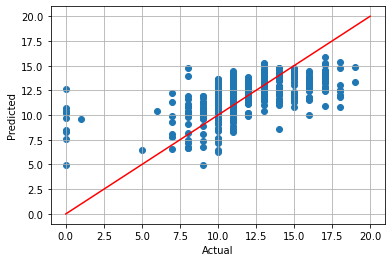

In [63]:
plt.scatter(y_train,y_tr_pred)
#Set to 20, because maximum score for y is 20
plt.plot([0, 20],[0, 20],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# Validating over the testing set

In [64]:
y_test_pred = regr.predict(X_test)
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_test_pred-y_test)**2)
TSS = np.sum((y_test - np.mean(y_test))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/n_test))
print("RMSE = {0:f}".format(np.sqrt(RSS/n_test)))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 1809.402643
Ein = 6.959241
RMSE = 2.638037
R^2 = 0.296432


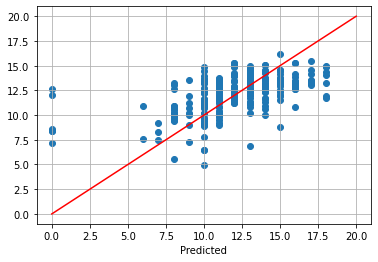

In [65]:
plt.scatter(y_test,y_test_pred)
plt.plot([0,20],[0,20],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

# Multiple Linear regression with regularization 

In [91]:
def gradient_descent_ridge(X_1, y_2d, learning_rate, w, N, num_iters, lamda):
    # Gradient descent on ridge regression
    #Closed form solution = (X.T * X + N*lamda*Idenitiy).inverse (X.T*y)
    identity = np.identity(w.shape[0])
    identity[0,0] = 0
    for i in range(num_iters): 
        first = np.linalg.inv(np.dot(X_1.T, X_1) + N*lamda*identity)
        second = np.dot(X_1.T, y_2d)
        ridge = np.dot(first,second)
        w = ridge
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [92]:
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent_ridge(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000, 0.1)
print(g)
print("g[0]: ", g[0][0])

[[11.95898006]
 [ 0.51085191]
 [ 0.39910249]
 [ 0.11376903]
 [ 0.15943674]
 [ 0.24629481]
 [ 0.13420288]
 [ 0.20750389]
 [ 0.27224265]
 [-0.02979643]
 [ 0.33101915]
 [-0.78529927]
 [-0.36823812]
 [-0.03093354]
 [-0.12100815]
 [ 0.14887651]
 [-0.14965393]
 [ 0.37536761]
 [ 0.15157654]
 [-0.15346735]
 [ 0.12592701]
 [-0.29559607]
 [-0.03073108]
 [-0.10021569]
 [-0.13938994]
 [-0.30687335]
 [-0.1860057 ]]
g[0]:  11.958980063270518


# As shown above the values that we get with gradient is different from what sklearn gave us. The num_iters and alpha, should be contributing to this.

# Neutral Network
## some of these code are taken from hw6 as I deemed them essential 

In [24]:
#Code copied from hw6, but edited to match our y values
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 20))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [25]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
print("Testing training set shape: ",y_v_train.shape)
print("Testing testing set shape: ",y_v_test.shape)

Testing training set shape:  (389, 20)
Testing testing set shape:  (260, 20)


In [26]:
# Sigmoid activation function - depends on whether we want to use it or not
def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

In [27]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)